Feladat:
Adott X a következő valószínűségi tényezőkkel: 1: 50%; 3: 25%; 5:25%
Adott Y egy normál eloszlás: középérték = 0, szórás = 1
Adott az alábbi összefüggés: Z = X + Y
Generáljon 10 millió adatot és adja meg a következő kérdésekre a választ:
a, Mi a valószínűsége, hogy az érték -2 vagy az alatti lesz?
b, Mi az alsó 5% értéke
c, Írjon függvényt, hogy kiszámoja az N. moment-et és generálja ki N= 3....10-ig.

In [19]:
from random import choices
from collections import Counter
from numpy import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def moment(elements, moment):
    mu = np.mean(elements)
    E = np.power(elements - mu, moment)
    E = np.sum(E)/len(E)
    return E

In [21]:
population = [0, 3, 5]
probability = [0.5, 0.25, 0.25]

In [22]:
# check the probability

ten_million_sample = choices(population, probability, k=10**7)
print(Counter(ten_million_sample))

Counter({0: 5002726, 5: 2499044, 3: 2498230})


In [23]:
count = 0
less_two = 0
trys = 10000000 #it takes time

z_list = []

while count < trys:
    x = choices(population, probability)
    y = random.normal(loc=0, scale=1, size=(1))
    z = x + y
    z_list.append(z[0])
    if z < -2:
        less_two += 1
    count += 1

In [24]:
print("Probability less than -2: ", (less_two/trys)*100)
z_list.sort()
print("5% Value-at-Risk: ", z_list[int(trys*0.05)])

Probability less than -2:  1.14359
5% Value-at-Risk:  -1.282945738927466


In [25]:
for n in range(3,11):
    moments = moment(z_list, n)
    if n is 3:
        print("The {}rd moment is:{}".format(n, moments))
    else:
        print("The {}th moment is:{}".format(n, moments))

The 3rd moment is:2.9905761823270818
The 4th moment is:58.53092758475077
The 5th moment is:74.84770956201378
The 6th moment is:860.2390012473545
The 7th moment is:1741.1170426715858
The 8th moment is:15774.198759026529
The 9th moment is:42852.713135515274
The 10th moment is:342699.2437914374


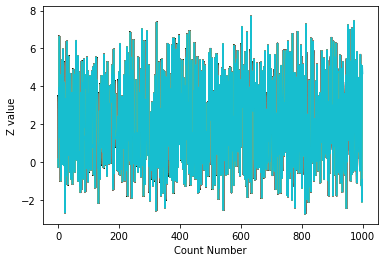

In [26]:
# Show a histogram which shows the peaks of the distribution.

count = 0
less_two = 0

# count number for the X axis
cX = []
# Z value for the y axis
zY = []

trys = 1000
z_list = []
while count < trys:
    x = choices(population, probability)
    y = random.normal(loc=0, scale=1, size=(1))
    z = x + y
    z_list.append(z[0])
    if z < -2:
        less_two += 1
    cX.append(count)
    zY.append(z)
    count += 1
    plt.plot(cX, zY)
plt.ylabel('Z value')
plt.xlabel('Count Number')
plt.show()